In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df= pd.read_csv('social_media_vs_productivity.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3   daily_social_media_time         27235 non-null  float64
 4   social_platform_preference      30000 non-null  object 
 5   number_of_notifications         30000 non-null  int64  
 6   work_hours_per_day              30000 non-null  float64
 7   perceived_productivity_score    28386 non-null  float64
 8   actual_productivity_score       27635 non-null  float64
 9   stress_level                    28096 non-null  float64
 10  sleep_hours                     27402 non-null  float64
 11  screen_time_before_sleep        27789 non-null  float64
 12  breaks_during_work              

In [12]:
df.isnull().sum()

age                                  0
gender                               0
job_type                             0
daily_social_media_time           2765
social_platform_preference           0
number_of_notifications              0
work_hours_per_day                   0
perceived_productivity_score      1614
actual_productivity_score         2365
stress_level                      1904
sleep_hours                       2598
screen_time_before_sleep          2211
breaks_during_work                   0
uses_focus_apps                      0
has_digital_wellbeing_enabled        0
coffee_consumption_per_day           0
days_feeling_burnout_per_month       0
weekly_offline_hours                 0
job_satisfaction_score            2730
dtype: int64

In [ ]:
df['gender']= df['gender'].astype('str')
df['gender']=  df['gender'].str.capitalize()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3   daily_social_media_time         27235 non-null  float64
 4   social_platform_preference      30000 non-null  object 
 5   number_of_notifications         30000 non-null  int64  
 6   work_hours_per_day              30000 non-null  float64
 7   perceived_productivity_score    28386 non-null  float64
 8   actual_productivity_score       27635 non-null  float64
 9   stress_level                    28096 non-null  float64
 10  sleep_hours                     27402 non-null  float64
 11  screen_time_before_sleep        27789 non-null  float64
 12  breaks_during_work              

In [23]:
df['gender'].str.contains(' ').sum()

df['gender'].unique()

df['job_type'].unique()

array(['Unemployed', 'Health', 'Finance', 'IT', 'Education', 'Student'],
      dtype=object)

In [9]:
df.pivot_table(values= 'daily_social_media_time', index='gender', columns='job_type', aggfunc= 'count' ).round(2)

job_type,Education,Finance,Health,IT,Student,Unemployed
gender,,,,,,
Female,2189,2187,2123,2153,2216,2161
Male,2218,2180,2190,2203,2168,2168
Other,184,179,167,186,188,175


In [12]:
def tiempo_redes (tiempo):
    if tiempo > 5:
        return 'Alto'
    elif tiempo >= 2:
        return 'Medio'
    else:
        return 'Bajo'
    
df['tiempo_redes']= df['daily_social_media_time'].apply(tiempo_redes)

df['tiempo_redes'].value_counts()

tiempo_redes
Medio    14423
Bajo     11194
Alto      4383
Name: count, dtype: int64

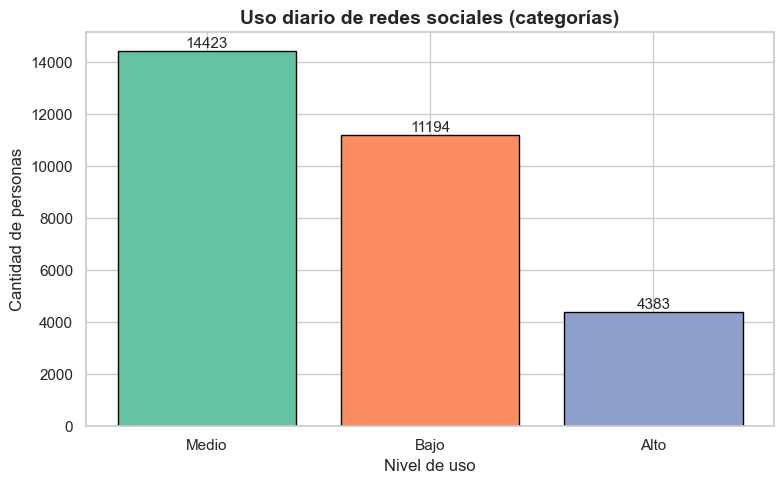

In [21]:
# intento de gráfico de barras

tiempo_redes= df['tiempo_redes'].value_counts()

sns.set(style='whitegrid')

plt.figure(figsize=(8, 5))
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

bars= plt.bar(tiempo_redes.index, tiempo_redes.values, color=colors, edgecolor= 'black')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval),
             ha='center', va='bottom', fontsize=11)
    
# Títulos y etiquetas
plt.title('Uso diario de redes sociales (categorías)', fontsize=14, fontweight='bold')
plt.xlabel('Nivel de uso', fontsize=12)
plt.ylabel('Cantidad de personas', fontsize=12)

# Ajustar márgenes
plt.tight_layout()